# Машинне навчання

## Метод дерева прийняття рішень (decision tree)

###  Лабораторна робота 2

**_Студентка Пороскун Олена. Група ПМ.м-21_**

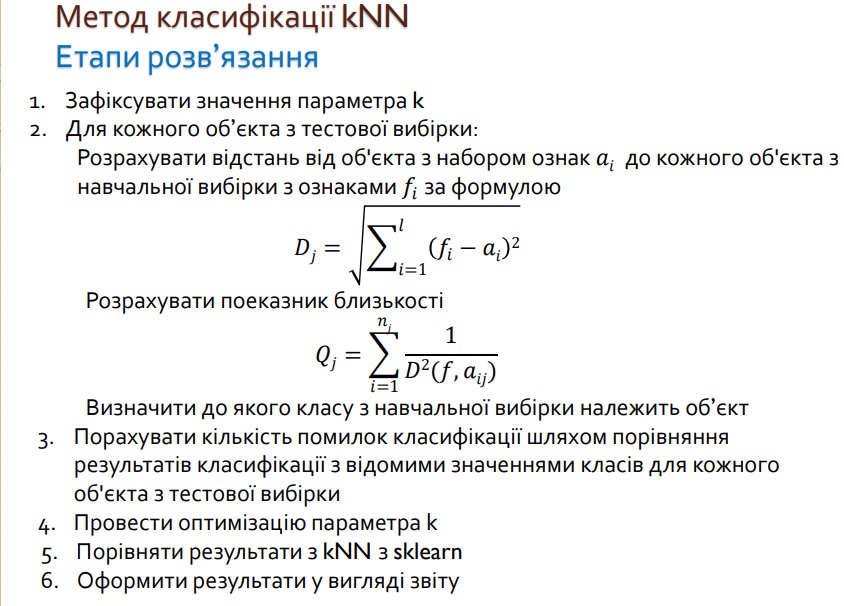

_______________________________________________________________________________________________________________________

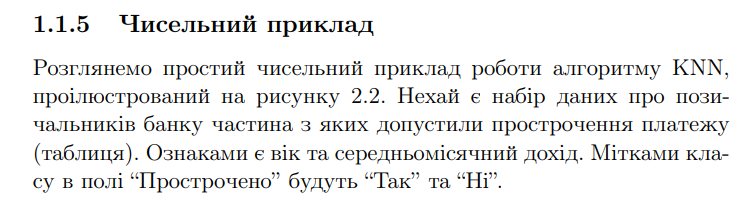



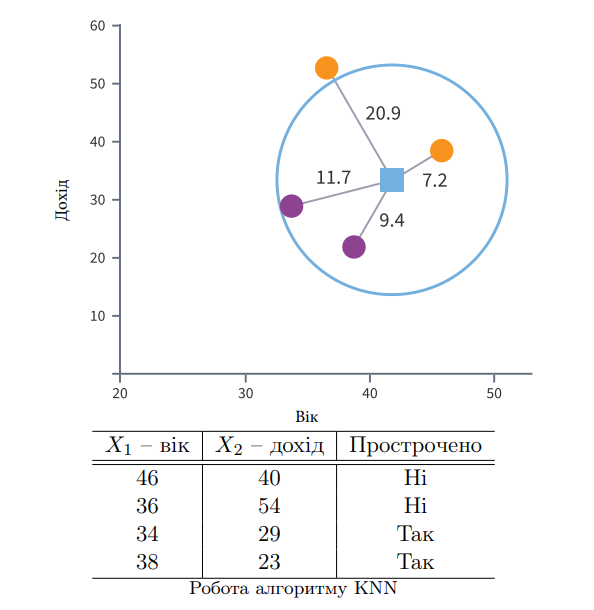

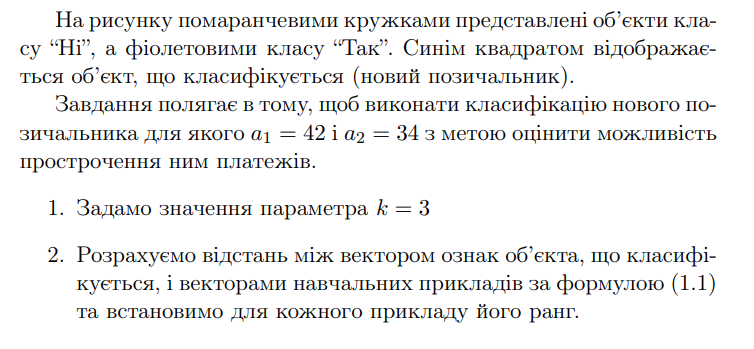

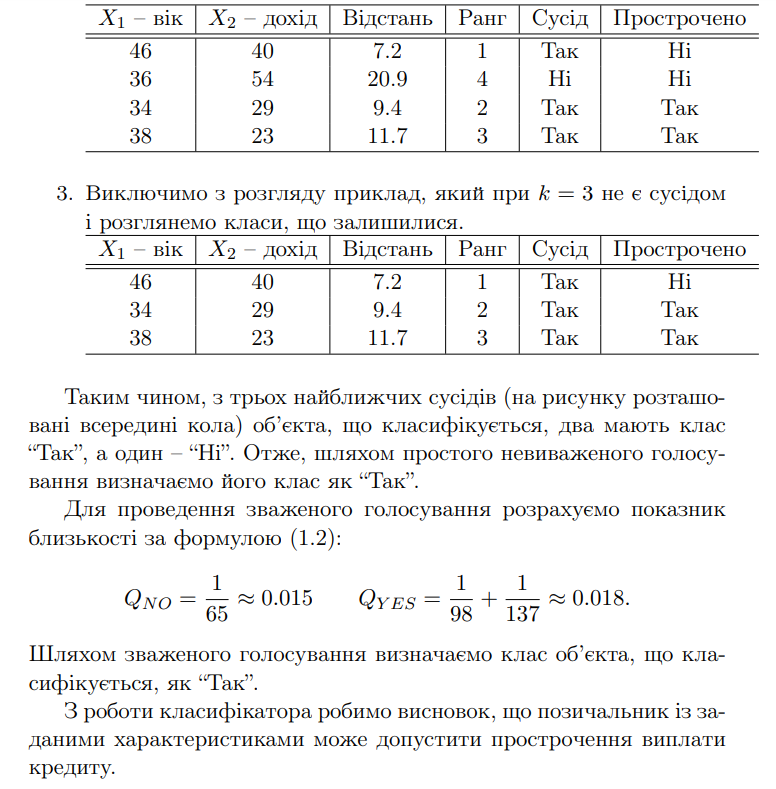

* Імпортуємо потрібні бібліотеки

In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

* Розглянемо датасет з ірисами. Створимо датафрейм з нього. 

In [4]:
iris = load_iris()
X, y = iris.data, iris.target

In [5]:
# dfIris = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])
dfIris = pd.DataFrame(data = np.c_[X, y], columns = iris['feature_names'] + ['target'])
dfIris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
print(iris['target_names'])

['setosa' 'versicolor' 'virginica']


In [7]:
print(dfIris['target'].unique())

[0. 1. 2.]


* Покажемо на графіках пари відповідних параметрів і значення цільовох функції.

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

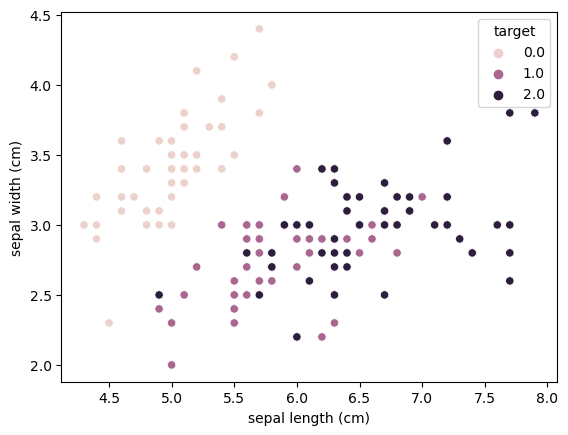

In [8]:
sns.scatterplot(x = dfIris['sepal length (cm)'], y = dfIris['sepal width (cm)'], hue = dfIris['target'])
#plt.legend(bbox_to_anchor=(1,1), loc="upper left")

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

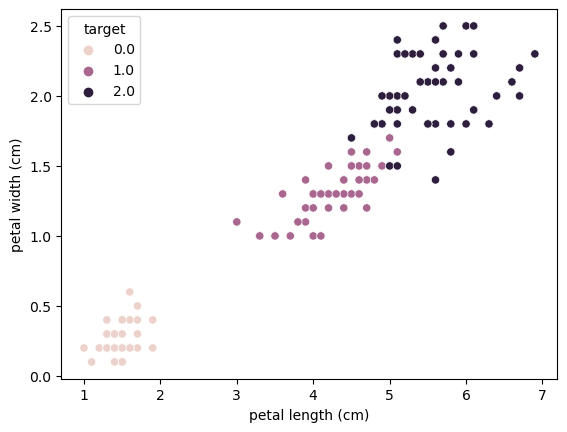

In [9]:
sns.scatterplot(x = dfIris['petal length (cm)'], y = dfIris['petal width (cm)'], hue = dfIris['target'])

* Розділимо вибірку на навчальну і тестову.

In [10]:
X_train, X_test, y_train, y_test = \
                 train_test_split(X, y, test_size = 0.25, random_state = 1) # 75% training and 25% test
#print(X_train.shape, X_test.shape)
#print(y_train.shape, y_test.shape)

* Далі потрібно знайти відстані за відповідними формулами. Також створимо ще навчальний і тестовий датафрейм. 

In [11]:
# знаходимо відстані між одним тестовим об'ктом (j) і всіма навчальними (0,...,len(X_train))
def fun_distance(X_train, X_test, j):
    n_train = len(X_train)
    distances = [np.linalg.norm(X_train[i] - X_test[j]) for i in range(n_train)]
    return distances

In [12]:
def fun_df(X_train, X_test, y_train, y_test):
    print('df_test(наприклад, перший):')
    df_test = pd.DataFrame(data = np.c_[X_test, y_test], columns = ['x1','x2','x3','x4',] + ['y'])
    display(df_test.head(1))
    
    print('\ndf_train(перші 5 рядків):')
    df_train = pd.DataFrame(data = np.c_[X_train, y_train], columns = ['x1','x2','x3','x4',] + ['y'])
    display(df_train.head())
    
    return df_test, df_train
    
df_test, df_train = fun_df(X_train, X_test, y_train, y_test)

df_test(наприклад, перший):


,x1,x2,x3,x4,y
0,5.8,4.0,1.2,0.2,0.0



df_train(перші 5 рядків):


,x1,x2,x3,x4,y
0,6.5,2.8,4.6,1.5,1.0
1,6.7,2.5,5.8,1.8,2.0
2,6.8,3.0,5.5,2.1,2.0
3,5.1,3.5,1.4,0.3,0.0
4,6.0,2.2,5.0,1.5,2.0


* Для проведення зваженого голосування розрахуємо показник близькостi **Q**.

In [13]:
def fun_Q(df_sort, clas):
    y = df_sort.query('`y` == @clas')

    if y.shape[0] == 0:
        Q = 0
    else:
        y['distances^2'] = (y['distances'])**2
        Q = 1 / y['distances^2']
        Q = Q.sum()

    #print('Q_{0:.0f} = {1}'.format(clas, Q))
    return clas, Q

* Тепер визначимо клас конкретного тестового об'єкта. 

In [14]:
def fun_Class(distances, df_train, k):
    # df_test = pd.DataFrame(data = np.c_[X_test, y_test], columns = ['x1','x2','x3','x4',] + ['y'])
    
    # df_train = pd.DataFrame(data = np.c_[X_train, y_train], columns = ['x1','x2','x3','x4',] + ['y'])
    df_train['distances'] = distances
    display(df_train.head())

    # df_sort
    df_sort = df_train.sort_values(by=['distances'])
    display(df_sort.head())
    
    print('\nk сусідів =',k)
    df_sort = df_sort.head(k)
    display(df_sort.head())
    
    classes = df_train['y'].unique()
    classes.sort()
    #print('classes =', classes)
    
    Q, Class = [], []
    for i in classes:
        cl, q = fun_Q(df_sort, clas=i)
        Q.append(q)
        Class.append(cl)
        
    df_new = pd.DataFrame(data = np.c_[Class, Q], columns = ['class', 'Q'])
    display(df_new)
   
    answer = df_new[ df_new['Q'] == df_new['Q'].max() ]
    answer = answer['class'].values
    answer = int(answer[0])
    
    namees_class = iris['target_names']
    print('class prediction: ', answer, '-', namees_class[answer])
    
    return answer

* **Виконаємо всі дії за алгоритмом для кожного тестового об'єкта по черзі і продемонструємо їх.**

In [15]:
k_neighbours = 3
y_pred = []
for j_test in range(len(X_test)):
    print("----", j_test+1, " тестовий об`єкт ----")
    distances = fun_distance(X_train, X_test, j=j_test)
    y_pr = fun_Class(distances, df_train, k=k_neighbours)
    y_pred.append(y_pr)
    print("y_test =", y_test[j_test], '\n\n')

---- 1  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,3.896152
1,6.7,2.5,5.8,1.8,2.0,5.174940
2,6.8,3.0,5.5,2.1,2.0,4.909175
3,5.1,3.5,1.4,0.3,0.0,0.888819
4,6.0,2.2,5.0,1.5,2.0,4.405678


,x1,x2,x3,x4,y,distances
62,5.7,4.4,1.5,0.4,0.0,0.547723
8,5.7,3.8,1.7,0.3,0.0,0.556776
42,5.4,3.7,1.5,0.2,0.0,0.583095
13,5.5,3.5,1.3,0.2,0.0,0.591608
44,5.2,4.1,1.5,0.1,0.0,0.685565



k сусідів = 3


,x1,x2,x3,x4,y,distances
62,5.7,4.4,1.5,0.4,0.0,0.547723
8,5.7,3.8,1.7,0.3,0.0,0.556776
42,5.4,3.7,1.5,0.2,0.0,0.583095


,class,Q
0,0.0,9.500316
1,1.0,0.000000
2,2.0,0.000000


class prediction:  0 - setosa
y_test = 0 


---- 2  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,2.184033
1,6.7,2.5,5.8,1.8,2.0,3.300000
2,6.8,3.0,5.5,2.1,2.0,3.223352
3,5.1,3.5,1.4,0.3,0.0,2.049390
4,6.0,2.2,5.0,1.5,2.0,2.249444


,x1,x2,x3,x4,y,distances
91,4.9,2.4,3.3,1.0,1.0,0.387298
39,5.0,2.3,3.3,1.0,1.0,0.387298
88,5.0,2.0,3.5,1.0,1.0,0.721110
106,5.7,2.6,3.5,1.0,1.0,0.793725
87,5.5,2.4,3.7,1.0,1.0,0.818535



k сусідів = 3


,x1,x2,x3,x4,y,distances
91,4.9,2.4,3.3,1.0,1.0,0.387298
39,5.0,2.3,3.3,1.0,1.0,0.387298
88,5.0,2.0,3.5,1.0,1.0,0.721110


,class,Q
0,0.0,0.00000
1,1.0,15.25641
2,2.0,0.00000


class prediction:  1 - versicolor
y_test = 1 


---- 3  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,0.316228
1,6.7,2.5,5.8,1.8,2.0,1.542725
2,6.8,3.0,5.5,2.1,2.0,1.319091
3,5.1,3.5,1.4,0.3,0.0,3.565109
4,6.0,2.2,5.0,1.5,2.0,1.170470


,x1,x2,x3,x4,y,distances
31,6.7,3.1,4.4,1.4,1.0,0.141421
6,6.6,2.9,4.6,1.3,1.0,0.244949
37,6.4,2.9,4.3,1.3,1.0,0.264575
0,6.5,2.8,4.6,1.5,1.0,0.316228
96,6.7,3.1,4.7,1.5,1.0,0.346410



k сусідів = 3


,x1,x2,x3,x4,y,distances
31,6.7,3.1,4.4,1.4,1.0,0.141421
6,6.6,2.9,4.6,1.3,1.0,0.244949
37,6.4,2.9,4.3,1.3,1.0,0.264575


,class,Q
0,0.0,0.000000
1,1.0,80.952381
2,2.0,0.000000


class prediction:  1 - versicolor
y_test = 1 


---- 4  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,3.810512
1,6.7,2.5,5.8,1.8,2.0,5.085273
2,6.8,3.0,5.5,2.1,2.0,4.827007
3,5.1,3.5,1.4,0.3,0.0,0.519615
4,6.0,2.2,5.0,1.5,2.0,4.260282


,x1,x2,x3,x4,y,distances
42,5.4,3.7,1.5,0.2,0.0,0.346410
75,5.1,3.7,1.5,0.4,0.0,0.412311
13,5.5,3.5,1.3,0.2,0.0,0.458258
44,5.2,4.1,1.5,0.1,0.0,0.458258
35,5.1,3.8,1.6,0.2,0.0,0.479583



k сусідів = 3


,x1,x2,x3,x4,y,distances
42,5.4,3.7,1.5,0.2,0.0,0.346410
75,5.1,3.7,1.5,0.4,0.0,0.412311
13,5.5,3.5,1.3,0.2,0.0,0.458258


,class,Q
0,0.0,18.977591
1,1.0,0.000000
2,2.0,0.000000


class prediction:  0 - setosa
y_test = 0 


---- 5  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,2.539685
1,6.7,2.5,5.8,1.8,2.0,1.878829
2,6.8,3.0,5.5,2.1,2.0,1.634013
3,5.1,3.5,1.4,0.3,0.0,5.984981
4,6.0,2.2,5.0,1.5,2.0,2.894823


,x1,x2,x3,x4,y,distances
14,7.7,3.8,6.7,2.2,2.0,0.412311
56,7.6,3.0,6.6,2.1,2.0,0.883176
60,7.2,3.6,6.1,2.5,2.0,0.932738
20,7.7,2.8,6.7,2.0,2.0,1.063015
16,7.3,2.9,6.3,1.8,2.0,1.104536



k сусідів = 3


,x1,x2,x3,x4,y,distances
14,7.7,3.8,6.7,2.2,2.0,0.412311
56,7.6,3.0,6.6,2.1,2.0,0.883176
60,7.2,3.6,6.1,2.5,2.0,0.932738


,class,Q
0,0.0,0.00000
1,1.0,0.00000
2,2.0,8.31383


class prediction:  2 - virginica
y_test = 2 


---- 6  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,0.556776
1,6.7,2.5,5.8,1.8,2.0,1.431782
2,6.8,3.0,5.5,2.1,2.0,1.109054
3,5.1,3.5,1.4,0.3,0.0,3.749667
4,6.0,2.2,5.0,1.5,2.0,1.183216


,x1,x2,x3,x4,y,distances
19,6.0,3.4,4.5,1.6,1.0,0.374166
29,6.1,3.0,4.9,1.8,2.0,0.458258
96,6.7,3.1,4.7,1.5,1.0,0.458258
76,5.9,3.2,4.8,1.8,1.0,0.469042
34,6.0,3.0,4.8,1.8,2.0,0.479583



k сусідів = 3


,x1,x2,x3,x4,y,distances
19,6.0,3.4,4.5,1.6,1.0,0.374166
29,6.1,3.0,4.9,1.8,2.0,0.458258
96,6.7,3.1,4.7,1.5,1.0,0.458258


C:\Users\Admin\AppData\Local\Temp\ipykernel_9888\151950262.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['distances^2'] = (y['distances'])**2
C:\Users\Admin\AppData\Local\Temp\ipykernel_9888\151950262.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['distances^2'] = (y['distances'])**2


,class,Q
0,0.0,0.000000
1,1.0,11.904762
2,2.0,4.761905


class prediction:  1 - versicolor
y_test = 1 


---- 7  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,1.067708
1,6.7,2.5,5.8,1.8,2.0,1.067708
2,6.8,3.0,5.5,2.1,2.0,0.469042
3,5.1,3.5,1.4,0.3,0.0,4.592385
4,6.0,2.2,5.0,1.5,2.0,1.506652


,x1,x2,x3,x4,y,distances
57,6.7,3.0,5.2,2.3,2.0,0.244949
15,6.9,3.1,5.4,2.1,2.0,0.360555
2,6.8,3.0,5.5,2.1,2.0,0.469042
30,6.5,3.2,5.1,2.0,2.0,0.509902
80,6.5,3.0,5.2,2.0,2.0,0.519615



k сусідів = 3


,x1,x2,x3,x4,y,distances
57,6.7,3.0,5.2,2.3,2.0,0.244949
15,6.9,3.1,5.4,2.1,2.0,0.360555
2,6.8,3.0,5.5,2.1,2.0,0.469042


,class,Q
0,0.0,0.000000
1,1.0,0.000000
2,2.0,28.904429


class prediction:  2 - virginica
y_test = 2 


---- 8  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,3.385262
1,6.7,2.5,5.8,1.8,2.0,4.628175
2,6.8,3.0,5.5,2.1,2.0,4.402272
3,5.1,3.5,1.4,0.3,0.0,0.591608
4,6.0,2.2,5.0,1.5,2.0,3.766962


,x1,x2,x3,x4,y,distances
35,5.1,3.8,1.6,0.2,0.0,0.360555
75,5.1,3.7,1.5,0.4,0.0,0.412311
69,5.0,3.5,1.6,0.6,0.0,0.479583
67,5.0,3.4,1.6,0.4,0.0,0.509902
70,4.8,3.4,1.9,0.2,0.0,0.538516



k сусідів = 3


,x1,x2,x3,x4,y,distances
35,5.1,3.8,1.6,0.2,0.0,0.360555
75,5.1,3.7,1.5,0.4,0.0,0.412311
69,5.0,3.5,1.6,0.6,0.0,0.479583


,class,Q
0,0.0,17.922487
1,1.0,0.000000
2,2.0,0.000000


class prediction:  0 - setosa
y_test = 0 


---- 9  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,3.753665
1,6.7,2.5,5.8,1.8,2.0,4.968903
2,6.8,3.0,5.5,2.1,2.0,4.823899
3,5.1,3.5,1.4,0.3,0.0,0.547723
4,6.0,2.2,5.0,1.5,2.0,3.992493


,x1,x2,x3,x4,y,distances
79,4.8,3.1,1.6,0.2,0.0,0.141421
77,4.6,3.1,1.5,0.2,0.0,0.173205
22,4.8,3.4,1.6,0.2,0.0,0.223607
82,4.6,3.2,1.4,0.2,0.0,0.223607
43,4.9,3.1,1.5,0.2,0.0,0.244949



k сусідів = 3


,x1,x2,x3,x4,y,distances
79,4.8,3.1,1.6,0.2,0.0,0.141421
77,4.6,3.1,1.5,0.2,0.0,0.173205
22,4.8,3.4,1.6,0.2,0.0,0.223607


,class,Q
0,0.0,103.333333
1,1.0,0.000000
2,2.0,0.000000


class prediction:  0 - setosa
y_test = 0 


---- 10  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,1.473092
1,6.7,2.5,5.8,1.8,2.0,0.888819
2,6.8,3.0,5.5,2.1,2.0,0.360555
3,5.1,3.5,1.4,0.3,0.0,5.081338
4,6.0,2.2,5.0,1.5,2.0,1.714643


,x1,x2,x3,x4,y,distances
73,6.8,3.2,5.9,2.3,2.0,0.223607
110,6.7,3.1,5.6,2.4,2.0,0.264575
45,6.7,3.3,5.7,2.1,2.0,0.300000
33,6.7,3.3,5.7,2.5,2.0,0.300000
2,6.8,3.0,5.5,2.1,2.0,0.360555



k сусідів = 3


,x1,x2,x3,x4,y,distances
73,6.8,3.2,5.9,2.3,2.0,0.223607
110,6.7,3.1,5.6,2.4,2.0,0.264575
45,6.7,3.3,5.7,2.1,2.0,0.300000


,class,Q
0,0.0,0.000000
1,1.0,0.000000
2,2.0,45.396825


class prediction:  2 - virginica
y_test = 2 


---- 11  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,1.009950
1,6.7,2.5,5.8,1.8,2.0,2.014944
2,6.8,3.0,5.5,2.1,2.0,1.964688
3,5.1,3.5,1.4,0.3,0.0,3.119295
4,6.0,2.2,5.0,1.5,2.0,1.044031


,x1,x2,x3,x4,y,distances
97,5.7,2.9,4.2,1.3,1.0,0.223607
41,5.5,2.5,4.0,1.3,1.0,0.300000
85,5.6,3.0,4.1,1.3,1.0,0.316228
32,5.7,2.8,4.5,1.3,1.0,0.331662
21,5.7,3.0,4.2,1.2,1.0,0.331662



k сусідів = 3


,x1,x2,x3,x4,y,distances
97,5.7,2.9,4.2,1.3,1.0,0.223607
41,5.5,2.5,4.0,1.3,1.0,0.300000
85,5.6,3.0,4.1,1.3,1.0,0.316228


,class,Q
0,0.0,0.000000
1,1.0,41.111111
2,2.0,0.000000


class prediction:  1 - versicolor
y_test = 1 


---- 12  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,3.469870
1,6.7,2.5,5.8,1.8,2.0,4.734976
2,6.8,3.0,5.5,2.1,2.0,4.483302
3,5.1,3.5,1.4,0.3,0.0,0.591608
4,6.0,2.2,5.0,1.5,2.0,3.917908


,x1,x2,x3,x4,y,distances
8,5.7,3.8,1.7,0.3,0.0,0.331662
42,5.4,3.7,1.5,0.2,0.0,0.346410
35,5.1,3.8,1.6,0.2,0.0,0.387298
75,5.1,3.7,1.5,0.4,0.0,0.412311
44,5.2,4.1,1.5,0.1,0.0,0.458258



k сусідів = 3


,x1,x2,x3,x4,y,distances
8,5.7,3.8,1.7,0.3,0.0,0.331662
42,5.4,3.7,1.5,0.2,0.0,0.346410
35,5.1,3.8,1.6,0.2,0.0,0.387298


,class,Q
0,0.0,24.090909
1,1.0,0.000000
2,2.0,0.000000


class prediction:  0 - setosa
y_test = 0 


---- 13  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,1.565248
1,6.7,2.5,5.8,1.8,2.0,0.714143
2,6.8,3.0,5.5,2.1,2.0,0.500000
3,5.1,3.5,1.4,0.3,0.0,5.266878
4,6.0,2.2,5.0,1.5,2.0,1.737815


,x1,x2,x3,x4,y,distances
73,6.8,3.2,5.9,2.3,2.0,0.412311
54,7.4,2.8,6.1,1.9,2.0,0.458258
2,6.8,3.0,5.5,2.1,2.0,0.500000
105,7.2,3.0,5.8,1.6,2.0,0.519615
45,6.7,3.3,5.7,2.1,2.0,0.538516



k сусідів = 3


,x1,x2,x3,x4,y,distances
73,6.8,3.2,5.9,2.3,2.0,0.412311
54,7.4,2.8,6.1,1.9,2.0,0.458258
2,6.8,3.0,5.5,2.1,2.0,0.500000


,class,Q
0,0.0,0.000000
1,1.0,0.000000
2,2.0,14.644258


class prediction:  2 - virginica
y_test = 2 


---- 14  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,0.424264
1,6.7,2.5,5.8,1.8,2.0,1.536229
2,6.8,3.0,5.5,2.1,2.0,1.249000
3,5.1,3.5,1.4,0.3,0.0,3.581899
4,6.0,2.2,5.0,1.5,2.0,1.187434


,x1,x2,x3,x4,y,distances
31,6.7,3.1,4.4,1.4,1.0,0.346410
96,6.7,3.1,4.7,1.5,1.0,0.374166
37,6.4,2.9,4.3,1.3,1.0,0.412311
6,6.6,2.9,4.6,1.3,1.0,0.424264
0,6.5,2.8,4.6,1.5,1.0,0.424264



k сусідів = 3


,x1,x2,x3,x4,y,distances
31,6.7,3.1,4.4,1.4,1.0,0.346410
96,6.7,3.1,4.7,1.5,1.0,0.374166
37,6.4,2.9,4.3,1.3,1.0,0.412311


,class,Q
0,0.0,0.000000
1,1.0,21.358543
2,2.0,0.000000


class prediction:  1 - versicolor
y_test = 1 


---- 15  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,0.519615
1,6.7,2.5,5.8,1.8,2.0,1.558846
2,6.8,3.0,5.5,2.1,2.0,1.417745
3,5.1,3.5,1.4,0.3,0.0,3.495712
4,6.0,2.2,5.0,1.5,2.0,0.860233


,x1,x2,x3,x4,y,distances
94,6.1,2.9,4.7,1.4,1.0,0.244949
93,5.9,3.0,4.2,1.5,1.0,0.331662
55,6.2,2.9,4.3,1.3,1.0,0.346410
32,5.7,2.8,4.5,1.3,1.0,0.374166
34,6.0,3.0,4.8,1.8,2.0,0.435890



k сусідів = 3


,x1,x2,x3,x4,y,distances
94,6.1,2.9,4.7,1.4,1.0,0.244949
93,5.9,3.0,4.2,1.5,1.0,0.331662
55,6.2,2.9,4.3,1.3,1.0,0.346410


,class,Q
0,0.0,0.000000
1,1.0,34.090909
2,2.0,0.000000


class prediction:  1 - versicolor
y_test = 1 


---- 16  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,4.141256
1,6.7,2.5,5.8,1.8,2.0,5.346962
2,6.8,3.0,5.5,2.1,2.0,5.200961
3,5.1,3.5,1.4,0.3,0.0,0.774597
4,6.0,2.2,5.0,1.5,2.0,4.352011


,x1,x2,x3,x4,y,distances
46,4.4,3.0,1.3,0.2,0.0,0.200000
82,4.6,3.2,1.4,0.2,0.0,0.223607
77,4.6,3.1,1.5,0.2,0.0,0.300000
26,4.7,3.2,1.3,0.2,0.0,0.300000
28,4.6,3.4,1.4,0.3,0.0,0.316228



k сусідів = 3


,x1,x2,x3,x4,y,distances
46,4.4,3.0,1.3,0.2,0.0,0.200000
82,4.6,3.2,1.4,0.2,0.0,0.223607
77,4.6,3.1,1.5,0.2,0.0,0.300000


,class,Q
0,0.0,56.111111
1,1.0,0.000000
2,2.0,0.000000


class prediction:  0 - setosa
y_test = 0 


---- 17  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,0.989949
1,6.7,2.5,5.8,1.8,2.0,2.102380
2,6.8,3.0,5.5,2.1,2.0,2.054264
3,5.1,3.5,1.4,0.3,0.0,2.978255
4,6.0,2.2,5.0,1.5,2.0,1.135782


,x1,x2,x3,x4,y,distances
63,5.8,2.7,3.9,1.2,1.0,0.141421
52,5.8,2.7,4.1,1.0,1.0,0.244949
41,5.5,2.5,4.0,1.3,1.0,0.331662
104,6.1,2.8,4.0,1.3,1.0,0.374166
97,5.7,2.9,4.2,1.3,1.0,0.387298



k сусідів = 3


,x1,x2,x3,x4,y,distances
63,5.8,2.7,3.9,1.2,1.0,0.141421
52,5.8,2.7,4.1,1.0,1.0,0.244949
41,5.5,2.5,4.0,1.3,1.0,0.331662


,class,Q
0,0.0,0.000000
1,1.0,75.757576
2,2.0,0.000000


class prediction:  1 - versicolor
y_test = 1 


---- 18  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,0.927362
1,6.7,2.5,5.8,1.8,2.0,1.800000
2,6.8,3.0,5.5,2.1,2.0,1.673320
3,5.1,3.5,1.4,0.3,0.0,3.398529
4,6.0,2.2,5.0,1.5,2.0,1.024695


,x1,x2,x3,x4,y,distances
32,5.7,2.8,4.5,1.3,1.0,0.300000
97,5.7,2.9,4.2,1.3,1.0,0.387298
93,5.9,3.0,4.2,1.5,1.0,0.424264
21,5.7,3.0,4.2,1.2,1.0,0.435890
85,5.6,3.0,4.1,1.3,1.0,0.447214



k сусідів = 3


,x1,x2,x3,x4,y,distances
32,5.7,2.8,4.5,1.3,1.0,0.300000
97,5.7,2.9,4.2,1.3,1.0,0.387298
93,5.9,3.0,4.2,1.5,1.0,0.424264


,class,Q
0,0.0,0.000000
1,1.0,23.333333
2,2.0,0.000000


class prediction:  1 - versicolor
y_test = 1 


---- 19  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,3.519943
1,6.7,2.5,5.8,1.8,2.0,4.790616
2,6.8,3.0,5.5,2.1,2.0,4.583667
3,5.1,3.5,1.4,0.3,0.0,0.346410
4,6.0,2.2,5.0,1.5,2.0,3.906405


,x1,x2,x3,x4,y,distances
101,5.4,3.4,1.7,0.2,0.0,0.282843
50,5.2,3.5,1.5,0.2,0.0,0.300000
13,5.5,3.5,1.3,0.2,0.0,0.316228
3,5.1,3.5,1.4,0.3,0.0,0.346410
42,5.4,3.7,1.5,0.2,0.0,0.360555



k сусідів = 3


,x1,x2,x3,x4,y,distances
101,5.4,3.4,1.7,0.2,0.0,0.282843
50,5.2,3.5,1.5,0.2,0.0,0.300000
13,5.5,3.5,1.3,0.2,0.0,0.316228


,class,Q
0,0.0,33.611111
1,1.0,0.000000
2,2.0,0.000000


class prediction:  0 - setosa
y_test = 0 


---- 20  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,3.957272
1,6.7,2.5,5.8,1.8,2.0,5.205766
2,6.8,3.0,5.5,2.1,2.0,5.037857
3,5.1,3.5,1.4,0.3,0.0,0.387298
4,6.0,2.2,5.0,1.5,2.0,4.257934


,x1,x2,x3,x4,y,distances
74,5.0,3.3,1.4,0.2,0.0,0.223607
90,4.9,3.0,1.4,0.2,0.0,0.300000
26,4.7,3.2,1.3,0.2,0.0,0.316228
43,4.9,3.1,1.5,0.2,0.0,0.331662
53,4.9,3.1,1.5,0.1,0.0,0.346410



k сусідів = 3


,x1,x2,x3,x4,y,distances
74,5.0,3.3,1.4,0.2,0.0,0.223607
90,4.9,3.0,1.4,0.2,0.0,0.300000
26,4.7,3.2,1.3,0.2,0.0,0.316228


,class,Q
0,0.0,41.111111
1,1.0,0.000000
2,2.0,0.000000


class prediction:  0 - setosa
y_test = 0 


---- 21  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,1.081665
1,6.7,2.5,5.8,1.8,2.0,1.941649
2,6.8,3.0,5.5,2.1,2.0,1.967232
3,5.1,3.5,1.4,0.3,0.0,3.283291
4,6.0,2.2,5.0,1.5,2.0,0.927362


,x1,x2,x3,x4,y,distances
32,5.7,2.8,4.5,1.3,1.0,0.316228
97,5.7,2.9,4.2,1.3,1.0,0.424264
41,5.5,2.5,4.0,1.3,1.0,0.424264
52,5.8,2.7,4.1,1.0,1.0,0.479583
21,5.7,3.0,4.2,1.2,1.0,0.489898



k сусідів = 3


,x1,x2,x3,x4,y,distances
32,5.7,2.8,4.5,1.3,1.0,0.316228
97,5.7,2.9,4.2,1.3,1.0,0.424264
41,5.5,2.5,4.0,1.3,1.0,0.424264


,class,Q
0,0.0,0.000000
1,1.0,21.111111
2,2.0,0.000000


class prediction:  1 - versicolor
y_test = 1 


---- 22  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,1.122497
1,6.7,2.5,5.8,1.8,2.0,1.928730
2,6.8,3.0,5.5,2.1,2.0,1.822087
3,5.1,3.5,1.4,0.3,0.0,3.374907
4,6.0,2.2,5.0,1.5,2.0,1.118034


,x1,x2,x3,x4,y,distances
32,5.7,2.8,4.5,1.3,1.0,0.412311
97,5.7,2.9,4.2,1.3,1.0,0.479583
85,5.6,3.0,4.1,1.3,1.0,0.489898
21,5.7,3.0,4.2,1.2,1.0,0.519615
93,5.9,3.0,4.2,1.5,1.0,0.583095



k сусідів = 3


,x1,x2,x3,x4,y,distances
32,5.7,2.8,4.5,1.3,1.0,0.412311
97,5.7,2.9,4.2,1.3,1.0,0.479583
85,5.6,3.0,4.1,1.3,1.0,0.489898


,class,Q
0,0.0,0.000000
1,1.0,14.396846
2,2.0,0.000000


class prediction:  1 - versicolor
y_test = 1 


---- 23  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,0.529150
1,6.7,2.5,5.8,1.8,2.0,0.948683
2,6.8,3.0,5.5,2.1,2.0,0.648074
3,5.1,3.5,1.4,0.3,0.0,4.210701
4,6.0,2.2,5.0,1.5,2.0,1.081665


,x1,x2,x3,x4,y,distances
66,6.9,3.1,4.9,1.5,1.0,0.316228
96,6.7,3.1,4.7,1.5,1.0,0.374166
80,6.5,3.0,5.2,2.0,2.0,0.412311
68,6.8,2.8,4.8,1.4,1.0,0.424264
30,6.5,3.2,5.1,2.0,2.0,0.424264



k сусідів = 3


,x1,x2,x3,x4,y,distances
66,6.9,3.1,4.9,1.5,1.0,0.316228
96,6.7,3.1,4.7,1.5,1.0,0.374166
80,6.5,3.0,5.2,2.0,2.0,0.412311


C:\Users\Admin\AppData\Local\Temp\ipykernel_9888\151950262.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['distances^2'] = (y['distances'])**2
C:\Users\Admin\AppData\Local\Temp\ipykernel_9888\151950262.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['distances^2'] = (y['distances'])**2


,class,Q
0,0.0,0.000000
1,1.0,17.142857
2,2.0,5.882353


class prediction:  1 - versicolor
y_test = 1 


---- 24  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,3.882010
1,6.7,2.5,5.8,1.8,2.0,5.137120
2,6.8,3.0,5.5,2.1,2.0,4.936598
3,5.1,3.5,1.4,0.3,0.0,0.141421
4,6.0,2.2,5.0,1.5,2.0,4.221374


,x1,x2,x3,x4,y,distances
3,5.1,3.5,1.4,0.3,0.0,0.141421
89,5.1,3.5,1.4,0.2,0.0,0.173205
9,5.0,3.6,1.4,0.2,0.0,0.173205
95,5.0,3.4,1.5,0.2,0.0,0.244949
74,5.0,3.3,1.4,0.2,0.0,0.244949



k сусідів = 3


,x1,x2,x3,x4,y,distances
3,5.1,3.5,1.4,0.3,0.0,0.141421
89,5.1,3.5,1.4,0.2,0.0,0.173205
9,5.0,3.6,1.4,0.2,0.0,0.173205


,class,Q
0,0.0,116.666667
1,1.0,0.000000
2,2.0,0.000000


class prediction:  0 - setosa
y_test = 0 


---- 25  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,1.643168
1,6.7,2.5,5.8,1.8,2.0,0.883176
2,6.8,3.0,5.5,2.1,2.0,0.734847
3,5.1,3.5,1.4,0.3,0.0,5.282992
4,6.0,2.2,5.0,1.5,2.0,1.878829


,x1,x2,x3,x4,y,distances
105,7.2,3.0,5.8,1.6,2.0,0.346410
16,7.3,2.9,6.3,1.8,2.0,0.435890
54,7.4,2.8,6.1,1.9,2.0,0.469042
73,6.8,3.2,5.9,2.3,2.0,0.648074
45,6.7,3.3,5.7,2.1,2.0,0.663325



k сусідів = 3


,x1,x2,x3,x4,y,distances
105,7.2,3.0,5.8,1.6,2.0,0.346410
16,7.3,2.9,6.3,1.8,2.0,0.435890
54,7.4,2.8,6.1,1.9,2.0,0.469042


,class,Q
0,0.0,0.000000
1,1.0,0.000000
2,2.0,18.141946


class prediction:  2 - virginica
y_test = 2 


---- 26  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,0.964365
1,6.7,2.5,5.8,1.8,2.0,2.056696
2,6.8,3.0,5.5,2.1,2.0,1.962142
3,5.1,3.5,1.4,0.3,0.0,3.023243
4,6.0,2.2,5.0,1.5,2.0,1.140175


,x1,x2,x3,x4,y,distances
97,5.7,2.9,4.2,1.3,1.0,0.141421
85,5.6,3.0,4.1,1.3,1.0,0.223607
21,5.7,3.0,4.2,1.2,1.0,0.244949
63,5.8,2.7,3.9,1.2,1.0,0.264575
52,5.8,2.7,4.1,1.0,1.0,0.331662



k сусідів = 3


,x1,x2,x3,x4,y,distances
97,5.7,2.9,4.2,1.3,1.0,0.141421
85,5.6,3.0,4.1,1.3,1.0,0.223607
21,5.7,3.0,4.2,1.2,1.0,0.244949


,class,Q
0,0.0,0.000000
1,1.0,86.666667
2,2.0,0.000000


class prediction:  1 - versicolor
y_test = 1 


---- 27  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,3.858756
1,6.7,2.5,5.8,1.8,2.0,5.123475
2,6.8,3.0,5.5,2.1,2.0,4.852834
3,5.1,3.5,1.4,0.3,0.0,0.812404
4,6.0,2.2,5.0,1.5,2.0,4.347413


,x1,x2,x3,x4,y,distances
44,5.2,4.1,1.5,0.1,0.0,0.346410
62,5.7,4.4,1.5,0.4,0.0,0.360555
42,5.4,3.7,1.5,0.2,0.0,0.519615
8,5.7,3.8,1.7,0.3,0.0,0.547723
35,5.1,3.8,1.6,0.2,0.0,0.600000



k сусідів = 3


,x1,x2,x3,x4,y,distances
44,5.2,4.1,1.5,0.1,0.0,0.346410
62,5.7,4.4,1.5,0.4,0.0,0.360555
42,5.4,3.7,1.5,0.2,0.0,0.519615


,class,Q
0,0.0,19.729345
1,1.0,0.000000
2,2.0,0.000000


class prediction:  0 - setosa
y_test = 0 


---- 28  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,3.742993
1,6.7,2.5,5.8,1.8,2.0,4.999000
2,6.8,3.0,5.5,2.1,2.0,4.771792
3,5.1,3.5,1.4,0.3,0.0,0.316228
4,6.0,2.2,5.0,1.5,2.0,4.130375


,x1,x2,x3,x4,y,distances
75,5.1,3.7,1.5,0.4,0.0,0.141421
35,5.1,3.8,1.6,0.2,0.0,0.141421
9,5.0,3.6,1.4,0.2,0.0,0.264575
3,5.1,3.5,1.4,0.3,0.0,0.316228
89,5.1,3.5,1.4,0.2,0.0,0.331662



k сусідів = 3


,x1,x2,x3,x4,y,distances
75,5.1,3.7,1.5,0.4,0.0,0.141421
35,5.1,3.8,1.6,0.2,0.0,0.141421
9,5.0,3.6,1.4,0.2,0.0,0.264575


,class,Q
0,0.0,114.285714
1,1.0,0.000000
2,2.0,0.000000


class prediction:  0 - setosa
y_test = 0 


---- 29  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,0.509902
1,6.7,2.5,5.8,1.8,2.0,1.421267
2,6.8,3.0,5.5,2.1,2.0,1.407125
3,5.1,3.5,1.4,0.3,0.0,3.631804
4,6.0,2.2,5.0,1.5,2.0,0.741620


,x1,x2,x3,x4,y,distances
94,6.1,2.9,4.7,1.4,1.0,0.223607
55,6.2,2.9,4.3,1.3,1.0,0.435890
32,5.7,2.8,4.5,1.3,1.0,0.458258
109,6.3,2.5,4.9,1.5,1.0,0.509902
0,6.5,2.8,4.6,1.5,1.0,0.509902



k сусідів = 3


,x1,x2,x3,x4,y,distances
94,6.1,2.9,4.7,1.4,1.0,0.223607
55,6.2,2.9,4.3,1.3,1.0,0.435890
32,5.7,2.8,4.5,1.3,1.0,0.458258


,class,Q
0,0.0,0.000000
1,1.0,30.025063
2,2.0,0.000000


class prediction:  1 - versicolor
y_test = 1 


---- 30  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,0.670820
1,6.7,2.5,5.8,1.8,2.0,0.900000
2,6.8,3.0,5.5,2.1,2.0,0.888819
3,5.1,3.5,1.4,0.3,0.0,4.237924
4,6.0,2.2,5.0,1.5,2.0,0.583095


,x1,x2,x3,x4,y,distances
24,6.3,2.7,4.9,1.8,2.0,0.244949
48,6.4,2.7,5.3,1.9,2.0,0.374166
18,6.2,2.8,4.8,1.8,2.0,0.387298
109,6.3,2.5,4.9,1.5,1.0,0.412311
47,6.0,2.7,5.1,1.6,1.0,0.479583



k сусідів = 3


,x1,x2,x3,x4,y,distances
24,6.3,2.7,4.9,1.8,2.0,0.244949
48,6.4,2.7,5.3,1.9,2.0,0.374166
18,6.2,2.8,4.8,1.8,2.0,0.387298


,class,Q
0,0.0,0.00000
1,1.0,0.00000
2,2.0,30.47619


class prediction:  2 - virginica
y_test = 2 


---- 31  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,0.458258
1,6.7,2.5,5.8,1.8,2.0,1.486607
2,6.8,3.0,5.5,2.1,2.0,1.337909
3,5.1,3.5,1.4,0.3,0.0,3.563706
4,6.0,2.2,5.0,1.5,2.0,0.905539


,x1,x2,x3,x4,y,distances
94,6.1,2.9,4.7,1.4,1.0,0.141421
55,6.2,2.9,4.3,1.3,1.0,0.346410
37,6.4,2.9,4.3,1.3,1.0,0.447214
93,5.9,3.0,4.2,1.5,1.0,0.458258
34,6.0,3.0,4.8,1.8,2.0,0.458258



k сусідів = 3


,x1,x2,x3,x4,y,distances
94,6.1,2.9,4.7,1.4,1.0,0.141421
55,6.2,2.9,4.3,1.3,1.0,0.346410
37,6.4,2.9,4.3,1.3,1.0,0.447214


,class,Q
0,0.0,0.000000
1,1.0,63.333333
2,2.0,0.000000


class prediction:  1 - versicolor
y_test = 1 


---- 32  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,2.090454
1,6.7,2.5,5.8,1.8,2.0,1.260952
2,6.8,3.0,5.5,2.1,2.0,1.100000
3,5.1,3.5,1.4,0.3,0.0,5.753260
4,6.0,2.2,5.0,1.5,2.0,2.319483


,x1,x2,x3,x4,y,distances
54,7.4,2.8,6.1,1.9,2.0,0.538516
56,7.6,3.0,6.6,2.1,2.0,0.547723
16,7.3,2.9,6.3,1.8,2.0,0.678233
20,7.7,2.8,6.7,2.0,2.0,0.700000
60,7.2,3.6,6.1,2.5,2.0,0.806226



k сусідів = 3


,x1,x2,x3,x4,y,distances
54,7.4,2.8,6.1,1.9,2.0,0.538516
56,7.6,3.0,6.6,2.1,2.0,0.547723
16,7.3,2.9,6.3,1.8,2.0,0.678233


,class,Q
0,0.0,0.000000
1,1.0,0.000000
2,2.0,8.955522


class prediction:  2 - virginica
y_test = 2 


---- 33  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,1.244990
1,6.7,2.5,5.8,1.8,2.0,2.304344
2,6.8,3.0,5.5,2.1,2.0,2.291288
3,5.1,3.5,1.4,0.3,0.0,2.853069
4,6.0,2.2,5.0,1.5,2.0,1.272792


,x1,x2,x3,x4,y,distances
65,5.5,2.4,3.8,1.1,1.0,0.173205
41,5.5,2.5,4.0,1.3,1.0,0.244949
87,5.5,2.4,3.7,1.0,1.0,0.264575
63,5.8,2.7,3.9,1.2,1.0,0.300000
52,5.8,2.7,4.1,1.0,1.0,0.360555



k сусідів = 3


,x1,x2,x3,x4,y,distances
65,5.5,2.4,3.8,1.1,1.0,0.173205
41,5.5,2.5,4.0,1.3,1.0,0.244949
87,5.5,2.4,3.7,1.0,1.0,0.264575


,class,Q
0,0.0,0.000000
1,1.0,64.285714
2,2.0,0.000000


class prediction:  1 - versicolor
y_test = 1 


---- 34  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,1.170470
1,6.7,2.5,5.8,1.8,2.0,0.556776
2,6.8,3.0,5.5,2.1,2.0,0.458258
3,5.1,3.5,1.4,0.3,0.0,4.802083
4,6.0,2.2,5.0,1.5,2.0,1.113553


,x1,x2,x3,x4,y,distances
17,6.4,2.8,5.6,2.2,2.0,0.100000
27,6.5,3.0,5.8,2.2,2.0,0.316228
5,6.3,2.9,5.6,1.8,2.0,0.331662
48,6.4,2.7,5.3,1.9,2.0,0.374166
38,6.5,3.0,5.5,1.8,2.0,0.387298



k сусідів = 3


,x1,x2,x3,x4,y,distances
17,6.4,2.8,5.6,2.2,2.0,0.100000
27,6.5,3.0,5.8,2.2,2.0,0.316228
5,6.3,2.9,5.6,1.8,2.0,0.331662


,class,Q
0,0.0,0.000000
1,1.0,0.000000
2,2.0,119.090909


class prediction:  2 - virginica
y_test = 2 


---- 35  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,1.244990
1,6.7,2.5,5.8,1.8,2.0,1.322876
2,6.8,3.0,5.5,2.1,2.0,1.135782
3,5.1,3.5,1.4,0.3,0.0,4.368066
4,6.0,2.2,5.0,1.5,2.0,1.104536


,x1,x2,x3,x4,y,distances
72,5.6,2.8,4.9,2.0,2.0,0.489898
78,5.8,2.7,5.1,1.9,2.0,0.509902
100,5.8,2.7,5.1,1.9,2.0,0.509902
23,5.7,2.5,5.0,2.0,2.0,0.519615
49,5.9,3.0,5.1,1.8,2.0,0.640312



k сусідів = 3


,x1,x2,x3,x4,y,distances
72,5.6,2.8,4.9,2.0,2.0,0.489898
78,5.8,2.7,5.1,1.9,2.0,0.509902
100,5.8,2.7,5.1,1.9,2.0,0.509902


,class,Q
0,0.0,0.000000
1,1.0,0.000000
2,2.0,11.858974


class prediction:  2 - virginica
y_test = 2 


---- 36  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,3.681032
1,6.7,2.5,5.8,1.8,2.0,4.944694
2,6.8,3.0,5.5,2.1,2.0,4.727579
3,5.1,3.5,1.4,0.3,0.0,0.316228
4,6.0,2.2,5.0,1.5,2.0,4.084116


,x1,x2,x3,x4,y,distances
42,5.4,3.7,1.5,0.2,0.0,0.100000
50,5.2,3.5,1.5,0.2,0.0,0.223607
35,5.1,3.8,1.6,0.2,0.0,0.244949
75,5.1,3.7,1.5,0.4,0.0,0.282843
89,5.1,3.5,1.4,0.2,0.0,0.300000



k сусідів = 3


,x1,x2,x3,x4,y,distances
42,5.4,3.7,1.5,0.2,0.0,0.100000
50,5.2,3.5,1.5,0.2,0.0,0.223607
35,5.1,3.8,1.6,0.2,0.0,0.244949


,class,Q
0,0.0,136.666667
1,1.0,0.000000
2,2.0,0.000000


class prediction:  0 - setosa
y_test = 0 


---- 37  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,1.284523
1,6.7,2.5,5.8,1.8,2.0,2.229350
2,6.8,3.0,5.5,2.1,2.0,2.251666
3,5.1,3.5,1.4,0.3,0.0,3.059412
4,6.0,2.2,5.0,1.5,2.0,1.140175


,x1,x2,x3,x4,y,distances
41,5.5,2.5,4.0,1.3,1.0,0.200000
65,5.5,2.4,3.8,1.1,1.0,0.300000
87,5.5,2.4,3.7,1.0,1.0,0.435890
11,5.2,2.7,3.9,1.4,1.0,0.519615
63,5.8,2.7,3.9,1.2,1.0,0.519615



k сусідів = 3


,x1,x2,x3,x4,y,distances
41,5.5,2.5,4.0,1.3,1.0,0.20000
65,5.5,2.4,3.8,1.1,1.0,0.30000
87,5.5,2.4,3.7,1.0,1.0,0.43589


,class,Q
0,0.0,0.000000
1,1.0,41.374269
2,2.0,0.000000


class prediction:  1 - versicolor
y_test = 1 


---- 38  тестовий об`єкт ----


,x1,x2,x3,x4,y,distances
0,6.5,2.8,4.6,1.5,1.0,3.738984
1,6.7,2.5,5.8,1.8,2.0,4.998000
2,6.8,3.0,5.5,2.1,2.0,4.810405
3,5.1,3.5,1.4,0.3,0.0,0.173205
4,6.0,2.2,5.0,1.5,2.0,4.090232


,x1,x2,x3,x4,y,distances
50,5.2,3.5,1.5,0.2,0.0,0.141421
89,5.1,3.5,1.4,0.2,0.0,0.141421
12,5.1,3.4,1.5,0.2,0.0,0.141421
3,5.1,3.5,1.4,0.3,0.0,0.173205
95,5.0,3.4,1.5,0.2,0.0,0.223607



k сусідів = 3


,x1,x2,x3,x4,y,distances
50,5.2,3.5,1.5,0.2,0.0,0.141421
89,5.1,3.5,1.4,0.2,0.0,0.141421
12,5.1,3.4,1.5,0.2,0.0,0.141421


,class,Q
0,0.0,150.0
1,1.0,0.0
2,2.0,0.0


class prediction:  0 - setosa
y_test = 0 




* **_Знайдемо точність - відповідність прогнозованих та реальних даних._**

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (точність):", accuracy)

Accuracy (точність): 1.0


_______________________________________________________________________________________________________________________

####  З використанням вбудованого алгоритму kNN з бібліотеки *sklearn* провести класифікацію об’єктів. Визначити кількість помилок.

In [17]:
# Масштабування функцій за допомогою StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (точність):", accuracy)

Accuracy (точність): 1.0


_______________________________________________________________________________________________________________________